In [1]:
###Fishstore Model by Sara Billey and Tim Chartier
import math
import numpy
from  random import *


In [2]:
###Simple Fishstore Model=First Pass
a = 1/3                           # probability of a customer each day
days_for_delivery = 2   # days from order to delivery of new tanks

stock = 1               # number of tanks in stock
deliv = -1              # number of days until delivery of tank on order,          		     #      -1 means none on order

total_cust = 0
total_sold = 0
total_lost = 0

print( "week    weekday    stock   customers    sold    lost \n")
for week in range(3):
    for weekday in range(7):
        sold = 0
        lost = 0
        if (deliv == 0):
            stock = stock+1   # a new tank is delivered

        if (deliv >= 0):
             deliv = deliv-1   # days till next delivery

        random_num = random()  # generate random number in [0,1]
        if (random_num < a):   # use this number to tell if a customer arrived
            customers = 1
        else:
            customers = 0
        if (customers==1):
            if (stock>0):             # we have a tank to sell the customer
                sold = sold+1
                stock = stock-1
                if (deliv < 0):
                    deliv = days_for_delivery  # we sold a tank and now order another 
            else:
                lost = lost+1      # we didn't have a tank and lost a customer
#Notice the indentations!  They matter in Python and for the accuracy of this experiment.
                
# keep track of total statistics:
        total_cust = total_cust + customers
        total_sold = total_sold + sold
        total_lost = total_lost + lost

      # display results for this day
        print (week, "\t  ", weekday,"\t    ", stock,"\t      ", customers,"\t ", sold,"\t ", lost)
       # endloop on weekday
# endloop on week 
print('\n totals over entire simulation:')
print ('customers   sold       lost')
print(week,total_cust, "\t     ", total_sold, "\t", total_lost)


week    weekday    stock   customers    sold    lost 

0 	   0 	     1 	       0 	  0 	  0
0 	   1 	     0 	       1 	  1 	  0
0 	   2 	     0 	       1 	  0 	  1
0 	   3 	     0 	       0 	  0 	  0
0 	   4 	     0 	       1 	  1 	  0
0 	   5 	     0 	       0 	  0 	  0
0 	   6 	     0 	       0 	  0 	  0
1 	   0 	     1 	       0 	  0 	  0
1 	   1 	     1 	       0 	  0 	  0
1 	   2 	     0 	       1 	  1 	  0
1 	   3 	     0 	       0 	  0 	  0
1 	   4 	     0 	       0 	  0 	  0
1 	   5 	     1 	       0 	  0 	  0
1 	   6 	     1 	       0 	  0 	  0
2 	   0 	     1 	       0 	  0 	  0
2 	   1 	     1 	       0 	  0 	  0
2 	   2 	     0 	       1 	  1 	  0
2 	   3 	     0 	       1 	  0 	  1
2 	   4 	     0 	       0 	  0 	  0
2 	   5 	     0 	       1 	  1 	  0
2 	   6 	     0 	       0 	  0 	  0

 totals over entire simulation:
customers   sold       lost
2 7 	      5 	 2


In [3]:
## Some common statistical tools:
def mean(alist):
    return sum(i for i in alist)/len(alist)
def myvariance(alist):
    mu = mean(alist)
    return sum((i-mu)**2 for i in alist)/len(alist)
def mystdev(alist):   
    return float(numpy.sqrt(myvariance(alist)))

In [4]:
# Test these functions
A=[3,6,1,2]
mean(A), myvariance(A), mystdev(A)

(3.0, 3.5, 1.8708286933869707)

In [20]:


###############################################################################
#Second pass at Python program for Monte Carlo simulation of the fish tank modeling problem.
###############################################################################

def fishstore_simulator(nsim, fixed_delivery = 12):  # number of different simulations to do

    # set fixed parameters:  
    nweeks = 104      # number of weeks in each simulation
    ndays = 7*nweeks  # number of days in each simulation

    a = 1/7   # probability of a customer each day

    days_for_delivery = 5   # days from order to delivery of new tanks

    # set strategy  parameters:
    order_when_out = 1        # = 1  ==>  order a new tank when stock==0
                              # = 0  ==>  don't order when out of tanks

    # fixed_delivery =  12     # >0   ==>  standing order for a new tank
                             #           every so many days

    # profits and losses:
    saleprofit = 20        # profit from selling one tank
    lostloss = 10          # loss from losing a customer
    overstockloss = .50    # cost of each tank overstock per night

    # initialize:
    profit = [0 for i in range(nsim)]

    # print column headings:
    # print( 'customers  sold      lost   fraction_served   overstock  end_stock   profit \n')

    stock_record = [0 for i in range(ndays)]     #   was numeric(0)

    for sim in range(nsim):

        # initialize:
        random_nums = [random() for i in range(ndays)]   # array of random numbers to use each day
        total_cust = 0
        total_sold = 0
        total_lost = 0
        stock = 1      # number of tanks in stock
        deliv =1       # number of days until delivery of tank on order
                       # -1 means none on order
        overstock = 0  # increment every night by number of excess tanks in stock


          # main loop for a single simulation:

        day = -1
        for week in range(nweeks):
            for weekday in range(7):

                day = day+1              # day in the simulation
                sold = 0
                lost = 0
                if (deliv == 0): 
                      stock = stock+1   # a new tank is delivered
                                # at the beginning of the day
                if (deliv >= 0):
                    deliv = deliv-1   # days till next delivery

                if numpy.mod(day, fixed_delivery) == 0 :
                    # A new tank is delivered every so many days regardless of stock
                    stock = stock+1

                # use random number to decide how many customers arrived.  Here assume 0 or 1 customers per day:
                if random_nums[day] < a:
                    customers = 1
                else:
                    customers = 0

                if  customers==1:
                    if stock>0 :            # we have a tank to sell the customer
                        sold = sold+1
                        stock = stock-1

                    else:
                        lost = lost+1      # we didn't have a tank and lost a customer

                if (order_when_out==1) & (stock==0) & (deliv < 0):
                    # none in stock and none on order
                    deliv = days_for_delivery  # order another

                if (stock > 1):
                    overstock = overstock + (stock - 1)


                # keep track of total statistics:
                total_cust = total_cust + customers
                total_sold = total_sold + sold
                total_lost = total_lost + lost
                stock_record[day] = stock  # keep track of stock on each day
    # end of day and week loops

        fraction_served = total_sold / total_cust

        profit[sim] = total_sold*saleprofit - total_lost*lostloss - overstock*overstockloss

        # output total statistics:
    #     print( total_cust,"\t    ", total_sold,"     ", total_lost,"\t", fraction_served,"\t", overstock,"\t  ", stock,"\t    ",profit[sim],"\n" )

    #  # end loop on sim


    # # compute and print average profit over all simulations:

    average_profit = mean(profit)
    # print( '  average profit     = ', average_profit,"\n")

    # # standard deviation:

    standard_deviation = mystdev(profit)
    # print( "  standard deviat
    # ion = ", standard_deviation,"\n\n")

    return (average_profit, standard_deviation)

In [24]:
max_N = 30
result = [0]*(max_N-7)
for N in range(7,max_N):
    result[N-7] = fishstore_simulator(500,fixed_delivery=N)

# result

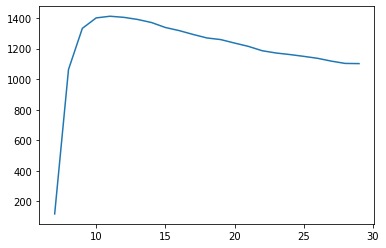

In [25]:
import matplotlib.pyplot as plt
averages = [x[0] for x in result]
plt.plot(range(7,max_N), averages)

In [27]:
averages
# N = 11 gives maximum profit

[117.471,
 1063.09,
 1332.511,
 1400.999,
 1411.868,
 1404.667,
 1390.78,
 1370.683,
 1338.261,
 1317.815,
 1292.798,
 1269.754,
 1259.048,
 1236.34,
 1214.619,
 1186.024,
 1171.227,
 1161.082,
 1149.237,
 1136.496,
 1117.899,
 1102.93,
 1101.722]